In [60]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
np.set_printoptions(threshold=np.nan)

df = pd.read_csv("precos_casa_california.csv")

In [61]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.25,37.85,52.0,919.0,,413.0,,4.0368,269700.0,NEAR BAY
2,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
3,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
4,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY


In [62]:
df.describe()

,latitude,median_income
count,20445.000000,20444.000000
mean,35.643596,3.876869
std,2.129236,1.904054
min,32.540000,0.499900
25%,33.940000,2.565750
50%,34.260000,3.540300
75%,37.720000,4.756600
max,41.950000,15.000100


In [63]:
features = list(df.columns[0:])
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [64]:
x= df[features]
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.25,37.85,52.0,919.0,,413.0,,4.0368,269700.0,NEAR BAY
2,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
3,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
4,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
5,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY
6,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,NaN,281500.0,NEAR BAY
7,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY
8,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
9,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY


In [65]:
cols = df.columns[0:9]
cols

Index([u'longitude', u'latitude', u'housing_median_age', u'total_rooms',
       u'total_bedrooms', u'population', u'households', u'median_income',
       u'median_house_value'],
      dtype='object')

In [66]:
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.25,37.85,52.0,919.0,NaN,413.0,NaN,4.0368,269700.0,NEAR BAY
2,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
3,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
4,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
5,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY
6,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,NaN,281500.0,NEAR BAY
7,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY
8,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
9,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY


In [67]:
dfSemnan = df.dropna(axis="rows")
dfSemnan

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
2,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
3,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
4,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
5,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY
7,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY
8,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
9,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY
10,-122.26,37.85,52.0,2643.0,626.0,1212.0,620.0,1.9167,159200.0,NEAR BAY
11,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY


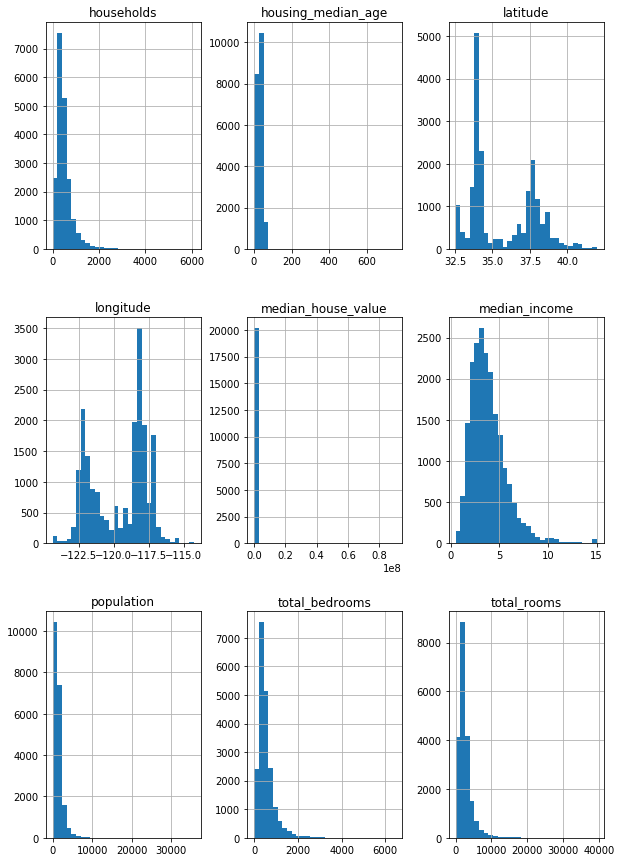

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
dfSemnan.hist(bins=30, figsize=(10,15))
plt.show()

In [72]:
dfSemnan['ocean_proximity'].unique()
y= dfSemnan.replace({'NEAR BAY':0, '<1H OCEAN':1, 'INLAND':2, 'NEAR OCEAN':3,'ISLAND':4})
y['ocean_proximity'].unique()

array([0, 1, 2, 3, 4, ' '], dtype=object)

In [73]:
cols1 = df.columns[0:10]
y[cols1] = y[cols1].apply(pd.to_numeric, errors='coerce')
y['ocean_proximity'].unique()

array([ 0.,  1.,  2.,  3.,  4., nan])

In [74]:
ySemnan = y.dropna(axis="rows") 
ySemnan

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0
2,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0.0
3,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,0.0
4,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,0.0
5,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,0.0
7,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,0.0
8,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,0.0
9,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,0.0
10,-122.26,37.85,52.0,2643.0,626.0,1212.0,620.0,1.9167,159200.0,0.0
11,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,0.0


In [75]:
ySemnan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20214 entries, 0 to 20444
Data columns (total 10 columns):
longitude             20214 non-null float64
latitude              20214 non-null float64
housing_median_age    20214 non-null float64
total_rooms           20214 non-null float64
total_bedrooms        20214 non-null float64
population            20214 non-null float64
households            20214 non-null float64
median_income         20214 non-null float64
median_house_value    20214 non-null float64
ocean_proximity       20214 non-null float64
dtypes: float64(10)
memory usage: 1.7 MB


In [76]:
ySN = ySemnan.drop(columns=['latitude', 'longitude'])
ySN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20214 entries, 0 to 20444
Data columns (total 8 columns):
housing_median_age    20214 non-null float64
total_rooms           20214 non-null float64
total_bedrooms        20214 non-null float64
population            20214 non-null float64
households            20214 non-null float64
median_income         20214 non-null float64
median_house_value    20214 non-null float64
ocean_proximity       20214 non-null float64
dtypes: float64(8)
memory usage: 1.4 MB


In [77]:
cols2 = ySN.columns
cols2

Index([u'housing_median_age', u'total_rooms', u'total_bedrooms', u'population',
       u'households', u'median_income', u'median_house_value',
       u'ocean_proximity'],
      dtype='object')

In [78]:
for i in cols2:
    ySN = ySN.loc[ySN[i] < ySN[i].quantile(0.95)]
ySN

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,0.0
11,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,0.0
14,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,0.0
16,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0,0.0
17,42.0,1639.0,367.0,929.0,366.0,1.7135,159800.0,0.0
21,41.0,535.0,123.0,317.0,119.0,2.4038,107500.0,0.0
22,49.0,1130.0,244.0,607.0,239.0,2.4597,93800.0,0.0
24,50.0,2082.0,492.0,1131.0,473.0,1.6424,108900.0,0.0
26,49.0,1916.0,447.0,863.0,378.0,1.9274,122300.0,0.0
28,48.0,1922.0,409.0,1026.0,335.0,1.7969,110400.0,0.0


In [79]:
ySN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12318 entries, 4 to 20443
Data columns (total 8 columns):
housing_median_age    12318 non-null float64
total_rooms           12318 non-null float64
total_bedrooms        12318 non-null float64
population            12318 non-null float64
households            12318 non-null float64
median_income         12318 non-null float64
median_house_value    12318 non-null float64
ocean_proximity       12318 non-null float64
dtypes: float64(8)
memory usage: 866.1 KB


In [80]:
features = list(ySN.columns[0:8])
features
x = ySN[features]

x = ySN.drop(columns=['median_house_value'])
y = ySN['median_house_value']

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=9)

In [82]:
# Create linear regression object
regr = GradientBoostingRegressor()

# Train the model using the training sets
model = regr.fit(x_train, y_train)

# score
score = model.score(x_test, y_test)
scorep = round(score*100)
print(scorep)

65.0
